<a href="https://colab.research.google.com/github/mirpouya/TensorFlow-Tutorial/blob/main/Human_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"pouyammsadeghi","key":"773ac957be00991204924caaf65a4f47"}'}

In [4]:
 ! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                      title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                          DAIGT V2 Train Dataset                           29MB  2023-11-16 01:38:36           2100        199  1.0              
muhammadbinimran/housing-price-prediction-data           Housing Price Prediction Data                   763KB  2023-11-21 17:56:32           9637        165  1.0              
thedrcat/daigt-proper-train-dataset                      DAIGT Proper Train Dataset                      119MB  2023-11-05 14:03:25           1909        155  1.0              
thedevastator/netflix-imdb-scores                        Netflix IMDB Scores                             699KB  202

In [9]:
! kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

 98% 303M/309M [00:01<00:00, 214MB/s]
100% 309M/309M [00:01<00:00, 164MB/s]


In [ ]:
! mkdir human-emotions-datasethes
! unzip human-emotions-datasethes.zip -d human-emotions-datasethes

In [11]:
import tensorflow as tf

In [16]:
train_directory = "/content/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train"
val_directory = "/content/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/test"
CLASS_NAMES = ["angry", "happy", "sad"]

CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
}

In [17]:
# create dataset from image files in a directory

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=None,
)

Found 6799 files belonging to 3 classes.


In [18]:
# create dataset from image files in a directory

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=None,
)

Found 2278 files belonging to 3 classes.


In [ ]:
# take one batch

for i in val_dataset.take(1):
  print(i)
  print(f"________{ len(i) } _______________")

<b> <h2> Data Visualization </h2> </b>

In [28]:
import matplotlib.pyplot as plt
import numpy as np

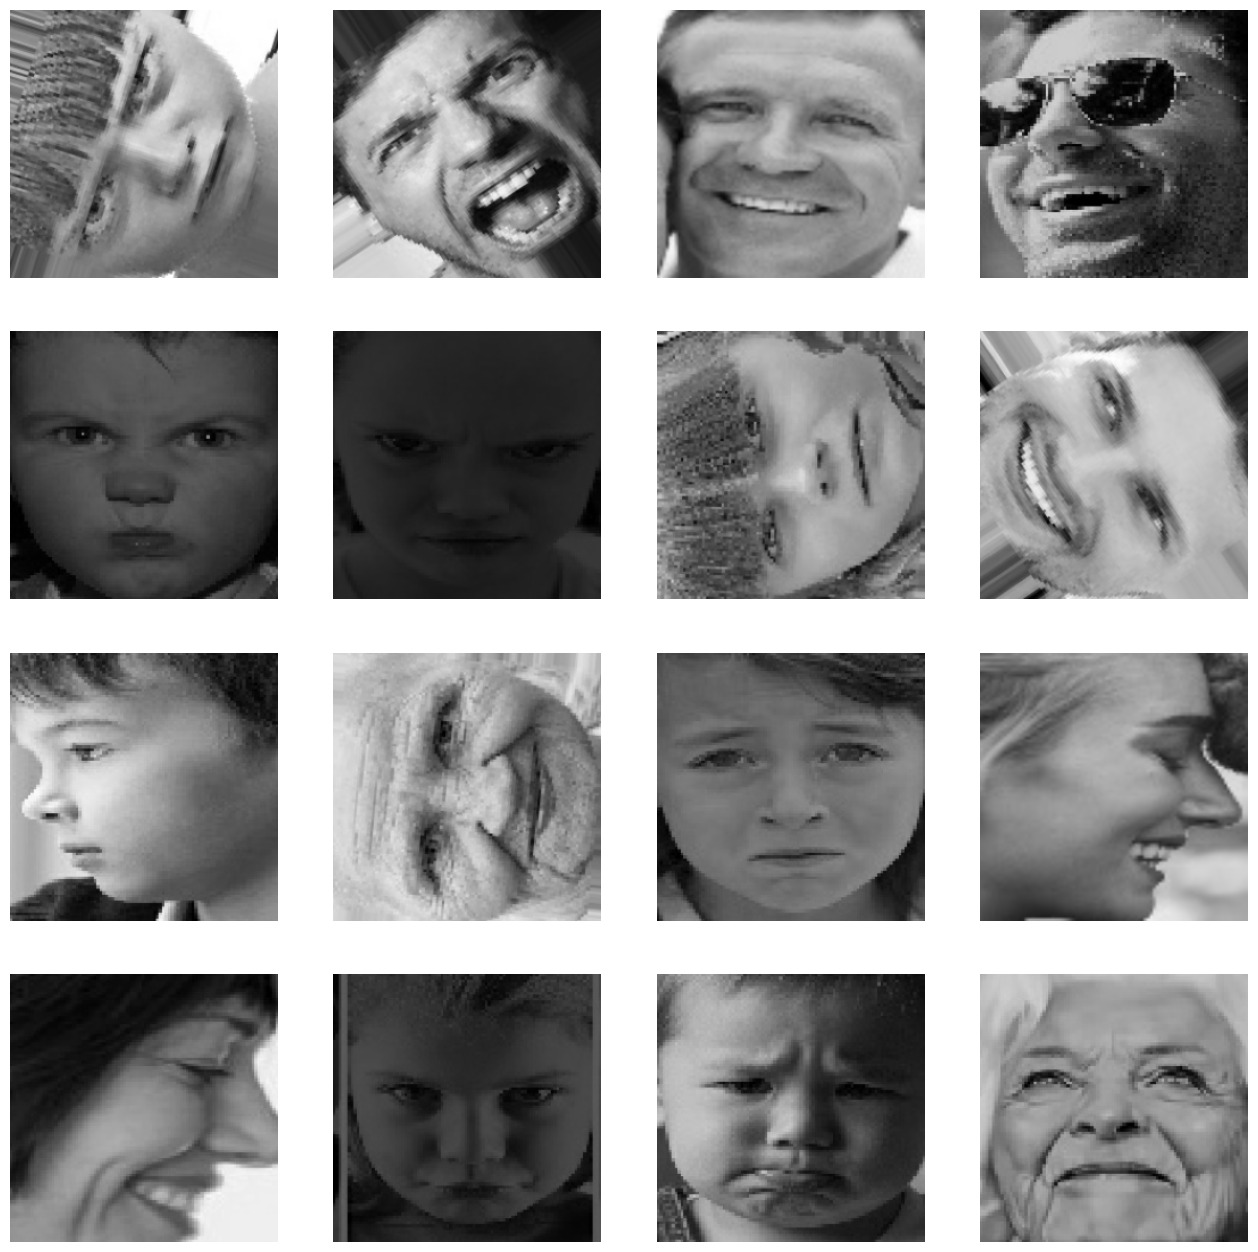

In [45]:
plt.figure(figsize = (16, 16))

for image, label in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(image[i]/255.)
    # plt.title(CLASS_NAMES[label[i].numpy()])
    plt.axis("off")

<b> <h2> Data Preparation </h2> <b>

In [50]:
# resize and rescale
from tensorflow.keras.layers import Resizing, Rescaling
from tensorflow.keras import Sequential

resize_rescale_layers = Sequential([
    Resizing(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    Rescaling(1./255)
])

In [55]:
training_dataset = (
    train_dataset.prefetch(tf.data.AUTOTUNE)
)

In [53]:
val_dataset = (
    val_dataset.prefetch(tf.data.AUTOTUNE)
)

<b> <h2> Model </h2> </b>

<b> <h3> Lenet </h3> <b>

In [56]:
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
    "LEARNING_RATE": 1e-3,
    "N_EPOCHS": 20,
    "DROPOUT_RATE": 0.0,
    "REGULARIZATION_RATE": 0.0,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 1024,
    "N_DENSE_2": 128,
    "NUM_CLASSES": 3,
    "PATCH_SIZE": 16,
    "PROJ_DIM": 768,
    "CLASS_NAMES": ["angry", "happy", "sad"],
}

In [ ]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import time
import random
from google.colab import files
from PIL import Image
import albumentations as A
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import matplotlib.cm as cm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Example, Features, Feature
from google.colab import drive

In [63]:
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Dense, Flatten
from tensorflow.keras.regularizers  import L2, L1

In [66]:
lenet_model = Sequential(
    [
        InputLayer(input_shape = (None, None, 3)),

        resize_rescale_layers,

        Conv2D(filters = CONFIGURATION["N_FILTERS"], kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"],
               padding = "valid", activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
        BatchNormalization(),
        MaxPool2D(pool_size = CONFIGURATION["POOL_SIZE"], strides = CONFIGURATION["N_STRIDES"]*2),
        Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

        Conv2D(filters = CONFIGURATION["N_FILTERS"] * 2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"],
               padding = "valid", activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
        BatchNormalization(),
        MaxPool2D(pool_size = CONFIGURATION["POOL_SIZE"], strides =  CONFIGURATION["N_STRIDES"] * 2),

        Flatten(),

        Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
        BatchNormalization(),
        Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

        Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
        BatchNormalization(),

        Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),
    ]
)

lenet_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 6)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 6)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)     